# Examples of Data Tool Features

This notebook contains sample data to show off the features of this code base. Please ensure you have downloaded the dependancies given below. The code has been commented and you are encouraged to modify it.

These tools were built for data collected from the Grumstup Lab at MSU. Some things are specific to this lab or even the speciifc table, so modification may be nesessary. Things should be well commented enough that you can find your way around.

#### Dependacies:

data.py

kinetic.py

spatialScan.py

ss.py

plotstyle.mplstyle

Data in exampleData/

#### Packages:

numpy, matplotlib, scipy, palettable, glob, re, PIL, io

In [1]:
from kinetic import KineticScan
from spatialScan import SpatialScan
from ss import SpatiallySeparated

import numpy as np
import matplotlib.pyplot as plt
import glob
import re

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

%matplotlib notebook

In [2]:
#Getting all data files in exampleData/
exampleData = glob.glob('example/**/*.dat', recursive=True)
kinetics = []
ss = []
so = []

for fpath in exampleData:
    #Getting the name of the file, and striping off the path and extentions
    fname = re.search('[\\\/][^\\\/\n]+.dat', fpath)[0][1:-4]
    #Making the right object and adding it to the proper list
    if 'KIN' in fname:
        ko = KineticScan(fpath, label=fname)
        kinetics.append(ko)
    elif 'GV' in fname:
        gv = SpatiallySeparated(fpath, label=fname)
        ss.append(gv)
    elif 'NP' in fname:
        img = SpatialScan(fpath, label=fname)
        so.append(img)
        
print(f'Number of Kinetic Scans: {len(kinetics)}, should be 3')
print(f'Number of SS Scans: {len(ss)}, should be 21')
print(f'Number of SO Scans: {len(so)}, should be 1')


Number of Kinetic Scans: 3, should be 3
Number of SS Scans: 21, should be 21
Number of SO Scans: 1, should be 1


## 1. Kinetic Scans

----------------------------
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-80ps_GV


<IPython.core.display.Javascript object>


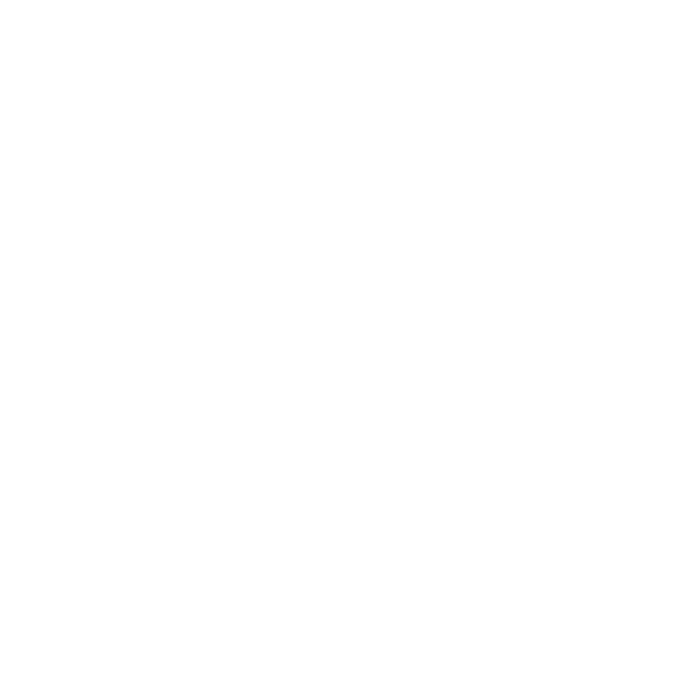

----------------------------
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-80ps_GV


<IPython.core.display.Javascript object>


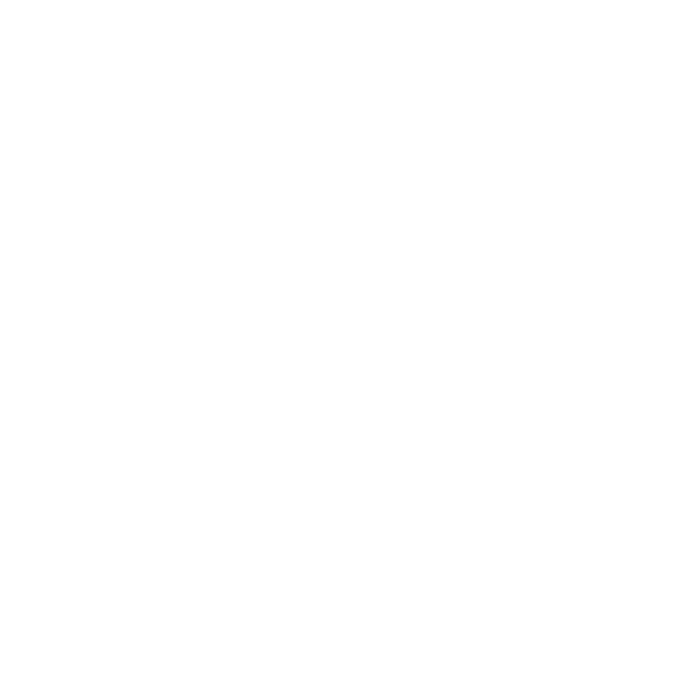

----------------------------
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-80ps_GV


<IPython.core.display.Javascript object>


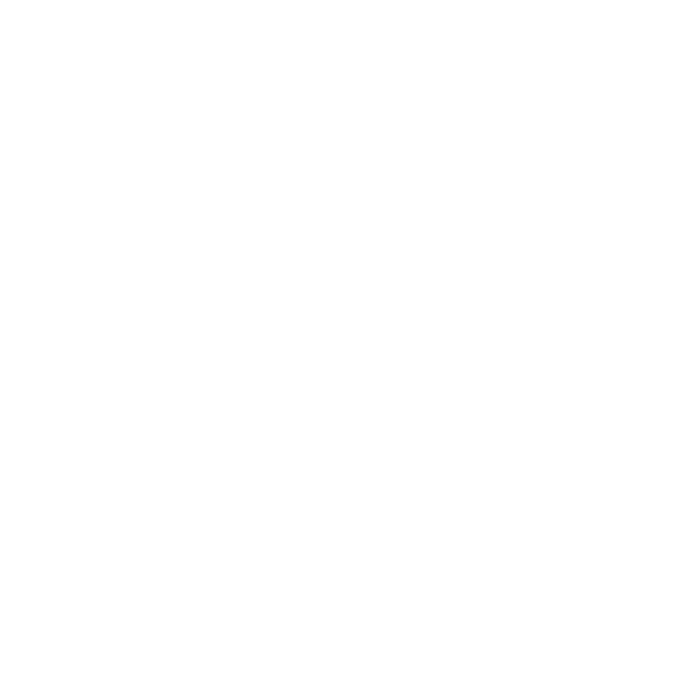

In [3]:
#Visualizeing all files
for k in kinetics:
    print(f'----------------------------\n{fname}')
    k.visualize()

In [4]:
#Fitting all scans with double exponetial curve
for k in kinetics:
    k.fitCurve()
    k.plotFit()

#A RuntimeWarning may apear below, that means that a fit isn't very good

C:\Users\Emerson Wright\Documents\01. REU Materials\Data-Analysis-Tools\kinetic.py:108: RuntimeWarning: overflow encountered in exp
  res = y0 + A1*np.exp((-(x-x0))/r1) + A2*np.exp((-(x-x0))/r2)
C:\Users\Emerson Wright\Documents\01. REU Materials\Data-Analysis-Tools\kinetic.py:108: RuntimeWarning: overflow encountered in exp
  res = y0 + A1*np.exp((-(x-x0))/r1) + A2*np.exp((-(x-x0))/r2)
C:\Users\Emerson Wright\Documents\01. REU Materials\Data-Analysis-Tools\kinetic.py:100: RuntimeWarning: invalid value encountered in sqrt
  self.var=np.sqrt(np.diagonal(covar))


<IPython.core.display.Javascript object>


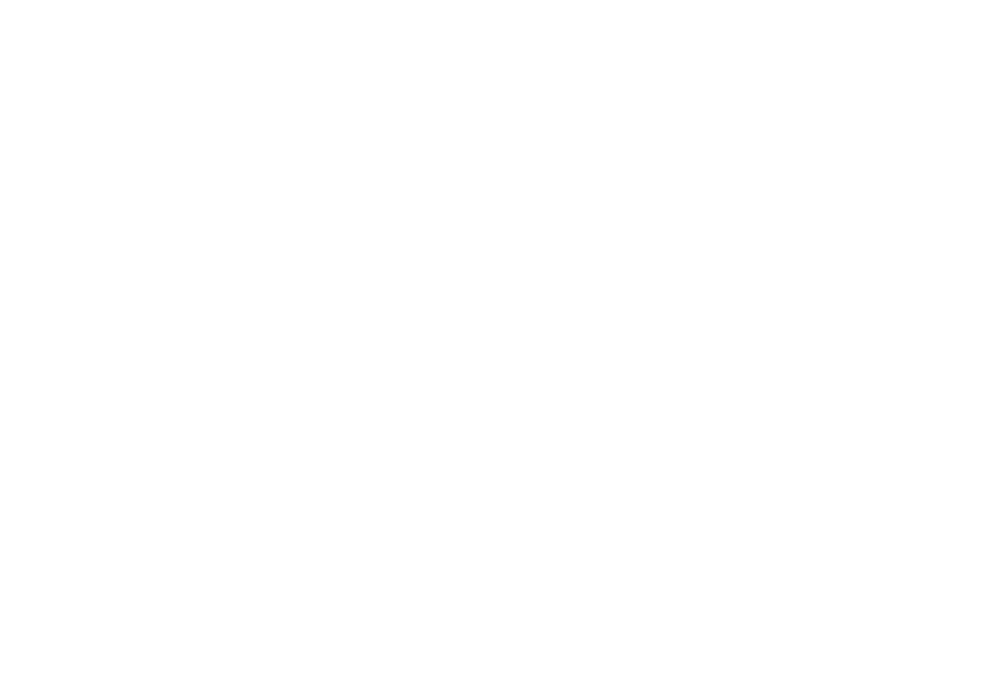

In [5]:
#Ploting R1 as an interactive plot
for k in kinetics:
    if 'R1' in k.label:
        R1 = k
        break

#Note I have to store what interactiveVis() returns, 
#or else it will be garbage collected
R1.interactiveVis()
plt.show()

## 02. Spatially Separated

In [6]:
%matplotlib inline
#The only feature now is creating a GIF given a directory full of ss scans

for i in range(3):
    SpatiallySeparated.mkGIF(f'example/R{i+1}', destPATH='outputs', name=f'R{i+1}')
    
    
%matplotlib notebook

## 03. Spatially Overlapped

<IPython.core.display.Javascript object>


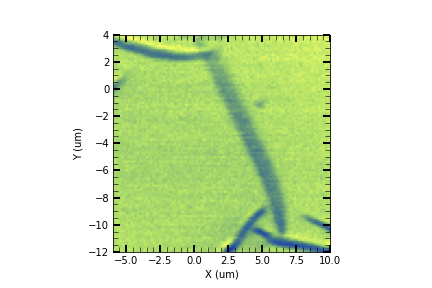

In [7]:
if type(so) == list:
    so = so[0]

so.visualize()
plt.show()